# Исследование маркетинга развлекательного приложения

В нашем распоряжении данные развлекательного приложения.  
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.  
  
Задача — разобраться в причинах и помочь компании выйти в плюс.  

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


**Описание данных**  
  
В распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.  
  
Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.  
  
Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.  
  
Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузим данные и подготовим их к анализу

Подключаем библиотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

#### Изучим данные и выполним предобработку.

In [3]:
visits

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В столбцах Session Start и Session End установлен тип данных object. Необходимо привести к типу Datetime.

In [5]:
orders

User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В столбце Event Dt установлен тип данных object. Необходимо привести к типу Datetime.

In [7]:
costs

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В столбце dt установлен тип данных object. Необходимо привести к типу Datetime и выделить дату, так как время не указано.

#### Приведем названия столбцов всех трех датафреймов к виду snake_case.

In [9]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [10]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [11]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

#### Изменим тип данных столбцов содержащих данные о дате и времени 
visits['session_start'], visits['session_end'], orders['event_dt'] и costs['dt'].

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [13]:
print(visits.info(), orders.info(), costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

#### Проверим наличие пропущенных значений в датафреймах.

In [14]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [15]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [16]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропущенные значения отсутствуют.

#### Проверим наличие дубликатов.

In [17]:
visits.duplicated().sum()

0

In [18]:
orders.duplicated().sum()

0

In [19]:
costs.duplicated().sum()

0

Дубликаты отсутствуют.

#### Проверим наличие редких и аномальных значений.

Изучим столбцы содержацие категориальные переменные.

In [20]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [21]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [22]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [23]:
costs['channel'].value_counts()

AdNonSense            180
FaceBoom              180
MediaTornado          180
lambdaMediaAds        180
YRabbit               180
TipTop                180
WahooNetBanner        180
OppleCreativeMedia    180
LeapBob               180
RocketSuperAds        180
Name: channel, dtype: int64

Редких и аномальных значений не установлено, неявные дубликаты также отсутствуют.

Проверим значения столбцов, содержащих чистовые значения.

In [24]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

<AxesSubplot:>

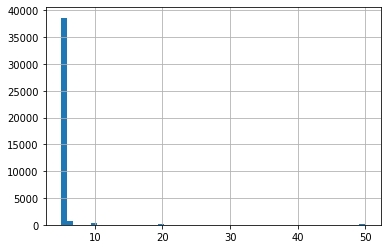

In [25]:
orders['revenue'].hist(bins=50)

In [26]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Всего 5 различных значений выручки. Более 96% значений выручки - 4.99

In [27]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

<AxesSubplot:>

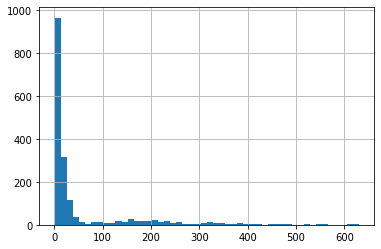

In [28]:
costs['costs'].hist(bins=50)

In [29]:
costs['costs'].value_counts()

6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
217.80     1
186.20     1
176.70     1
273.00     1
55.00      1
Name: costs, Length: 608, dtype: int64

Большая часть значений расходов на рекламную кампанию (3 квартиль) лежит в пределах до 33.6. 
Медиана 12.29, среднее значение 58.6, на его значительное отклонение от медианы повлияли некоторые дорогие рекламные кампании стоимостью до 630.

Проверим максимальные и минимальные даты, содержащиеся в столбцах.

In [30]:
print(visits['session_start'].dt.date.min(), visits['session_start'].dt.date.max())
print(visits['session_end'].dt.date.min(), visits['session_end'].dt.date.max())
print(orders['event_dt'].dt.date.min(), orders['event_dt'].dt.date.max())
print(costs['dt'].min(), costs['dt'].max())

2019-05-01 2019-10-31
2019-05-01 2019-11-01
2019-05-01 2019-10-31
2019-05-01 2019-10-27


Все даты в одном диапазоне. Никаких отклонений не установлено.

#### Вывод.   
Проведена предобработка данных:
- Названия столбцов всех трех датафреймов приведены к виду snake_case;
- Пропуски и дубликаты не установлены;
- Редких и аномальных значений не выявлено;
- Столбцы с датой и временем приведены к типу Datetime.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Используем функции из теоретических уроков.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [31]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [32]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [33]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [34]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [35]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [36]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [37]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [38]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Вывод.  
Заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии, а также для построения графиков.

### Исследовательский анализ данных

#### Составим профили пользователей.  
Используем функцию get_profiles

In [39]:
profiles = get_profiles(visits, orders, None, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

Определим минимальную и максимальную даты привлечения пользователей

In [40]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [41]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Самая ранняя дата привлечения пользователей 01 мая 2019, самая поздняя - 27 октября 2019.

####  Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.   
  
Сделаем функцию для построения сводной таблицы по определенному параметру из таблицы profiles.

In [42]:
def profile_pivot(parameter):
    p_payers = profiles.pivot_table(
        index=parameter, columns = 'payer', values='user_id', aggfunc='count'
    ).reset_index()
    p_payers.columns = [parameter, 'payer_f', 'payer_t']
    p_payers['all_users'] = p_payers[['payer_f', 'payer_t']].sum(axis = 1)
    p_payers['percentage'] = p_payers['payer_t'] / p_payers['all_users'] * 100
    p_payers = p_payers.sort_values(
        by = 'percentage', ascending = False
        ).style.format({'percentage': '{:.2f}%'})
    return p_payers

Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [43]:
profile_pivot('region')

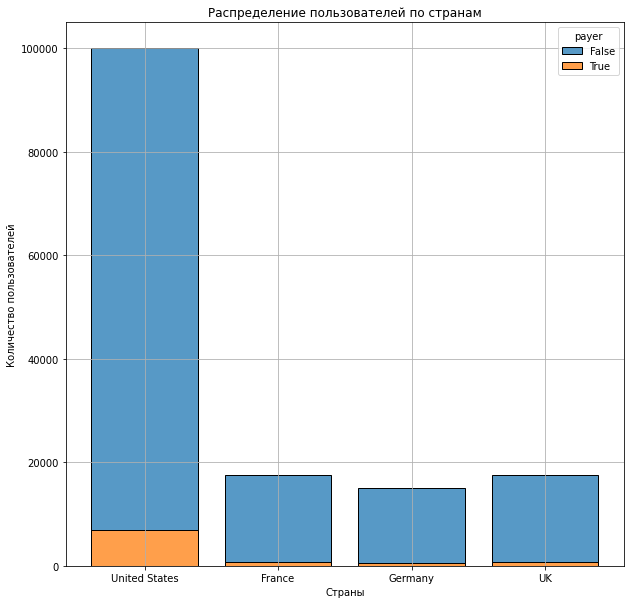

In [44]:
plt.figure(figsize=(10, 10))
sns.histplot(data=profiles, x = 'region', hue = 'payer', multiple='stack', shrink=.8)
plt.grid(True)
plt.xlabel('Страны')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по странам')
plt.show()

Всего в списке стран - 4 страны. Самое большое число пользователей в Соединенных Штатах Америки - 100 002 пользователя из 150 008, то есть 66%. Самое маленькое число в Германии - 14 981. Во Франции и Великобритании число пользователей примерно одинаковое 17 450 и 14 981 соответственно.  
Доля платящих пользователей самая большая так же в Соединенных Штатах Америки - 6.9%, затем идут Германия - 4.11%, Великобритания - 3.98% и Франция - 3.8%.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.   
Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [45]:
profile_pivot('device')

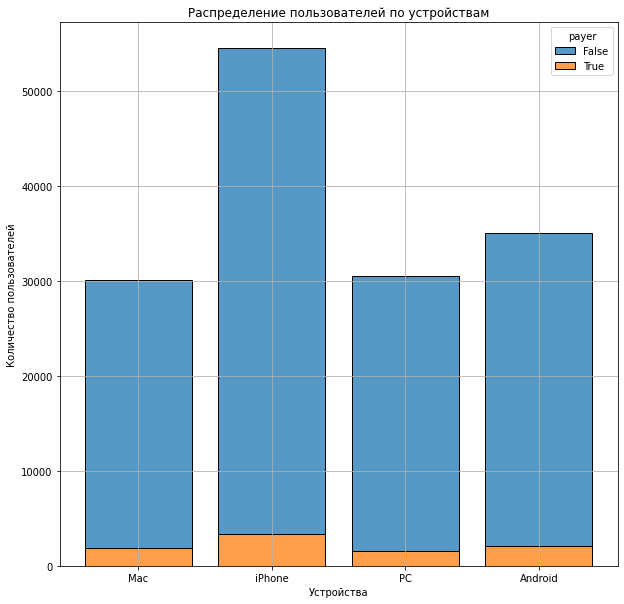

In [46]:
plt.figure(figsize=(10, 10))
sns.histplot(data=profiles, x = 'device', hue = 'payer', multiple='stack', shrink=.8)
plt.grid(True)
plt.xlabel('Устройства')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по устройствам')
plt.show()

Всего в списке 4 устройства: Mac, iPhone, Android и PC.  
Самое большое число пользователей владельцы iPhone - 54 479 пользователя из 150 008. Самое маленькое число пользователей Mac - 30 042. Чуть больше пользователей PC - 30 455, на втором месте пользователи Android - 35 032.
Доля платящих пользователей самая большая у владельцев Mac - 6.36%, затем iPhone - 6.21%, Android - 5.85% и PC - 5.05%.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.   
Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [47]:
profile_pivot('channel')

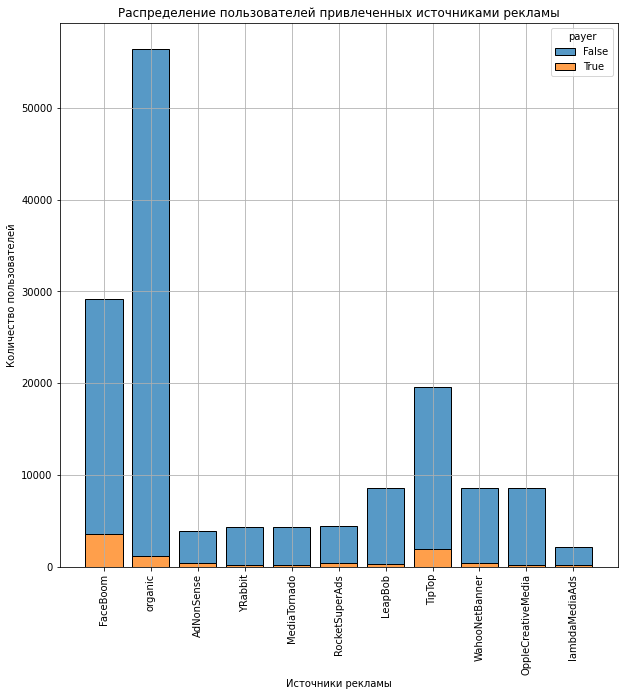

In [48]:
plt.figure(figsize=(10, 10))
sns.histplot(data=profiles, 
             x = 'channel', 
             hue = 'payer', 
             multiple='stack', 
             shrink=.8)
plt.grid(True)
plt.xlabel('Источники рекламы')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей привлеченных источниками рекламы')
plt.xticks(rotation='vertical')
plt.show()

Всего в данных содержится информация о 10 каналах привлечения пользователей (среди которых также organic).  
Самое большое количество пользователей пришло самостоятельно. На первом месте среди каналов - organic 56 439 пользователей из 150 008, то есть больше трети. Но при этом доля платящих пользователей канала organic самая маленькая и составляет всего 2.06%.  На втором месте по количество привлеченных пользователей FaceBoom - 29 144 пользователей, при этом доля платящих пользователей также самая большая - 12.20%.  
На третьем месте TipTop - 19 561 пользователей. Доля платящих достаточно большая - 9.60% (четвертая по величине).  
Меньше всего пользователей пришло из рекламы в lambdaMediaAds - 2149, но при этом доля платящих пользователей 10.47% (третья по величине).  
На четвертом, пятом и шестом местах OppleCreativeMedia (8605, доля платящих 2.06%), WahooNetBanner (8553, доля платящих 5.30%) и LeapBob (8553, доля платящих 3.06%)

#### Вывод.  
- Всего в списке стран - 4 страны. Самое большое число пользователей в Соединенных Штатах Америки - 100 002 пользователя из 150 008, то есть 66%. Доля платящих также самая большая - 6.9%. Самое маленькое число в Германии - 14 981 (доля платящих - 4.11%). Во Франции и Великобритании число пользователей примерно одинаковое 17 450 (доля платящих - 3.8%) и 14 981 (доля платящих - 3.98%) соответственно.  
- Всего в списке 4 устройства: Mac, iPhone, Android и PC. Самое большое число пользователей владельцы iPhone - 54 479 пользователя из 150 008. Доля платящих пользователей 6.21%. Самое маленькое число пользователей Mac - 30 042 (доля платящих - 6.36%). Чуть больше пользователей PC - 30 455 (доля платящих - 5.05%), на втором месте пользователи Android - 35 032 (доля платящих - 5.85%).
- Всего в данных содержится информация о 10 каналах привлечения пользователей (среди которых также organic). Самое большое количество пользователей пришло самостоятельно. На первом месте среди каналов - organic 56 439 пользователей из 150 008, то есть больше трети. Но при этом доля платящих пользователей канала organic самая маленькая и составляет всего 2.06%.  На втором месте по количество привлеченных пользователей FaceBoom - 29 144 пользователей, при этом доля платящих пользователей также самая большая - 12.20%.  На третьем месте TipTop - 19 561 пользователей. Доля платящих достаточно большая - 9.60% (четвертая по величине).  Меньше всего пользователей пришло из рекламы в lambdaMediaAds - 2149, но при этом доля платящих пользователей 10.47% (третья по величине).

### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг.

In [49]:
costs['costs'].sum()

105497.30000000002

Всего на маркетинг потрачено 105497.3

#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [50]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

Больше всего денег потрачено на TipTop - 54751.30 и FaceBoom - 32445.60

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику.

Добавим столбцы содержащие неделю и месяц в который произведены расходы.

In [51]:
costs_dinamic = costs
costs_dinamic['month'] = costs_dinamic['dt'].astype('datetime64[M]')
costs_dinamic['week'] = costs_dinamic['dt'].astype('datetime64[W]')
costs_dinamic

dt         channel  costs      month       week
0     2019-05-01        FaceBoom  113.3 2019-05-01 2019-04-25
1     2019-05-02        FaceBoom   78.1 2019-05-01 2019-05-02
2     2019-05-03        FaceBoom   85.8 2019-05-01 2019-05-02
3     2019-05-04        FaceBoom  136.4 2019-05-01 2019-05-02
4     2019-05-05        FaceBoom  122.1 2019-05-01 2019-05-02
...          ...             ...    ...        ...        ...
1795  2019-10-23  lambdaMediaAds    4.0 2019-10-01 2019-10-17
1796  2019-10-24  lambdaMediaAds    6.4 2019-10-01 2019-10-24
1797  2019-10-25  lambdaMediaAds    8.8 2019-10-01 2019-10-24
1798  2019-10-26  lambdaMediaAds    8.8 2019-10-01 2019-10-24
1799  2019-10-27  lambdaMediaAds   12.0 2019-10-01 2019-10-24

[1800 rows x 5 columns]

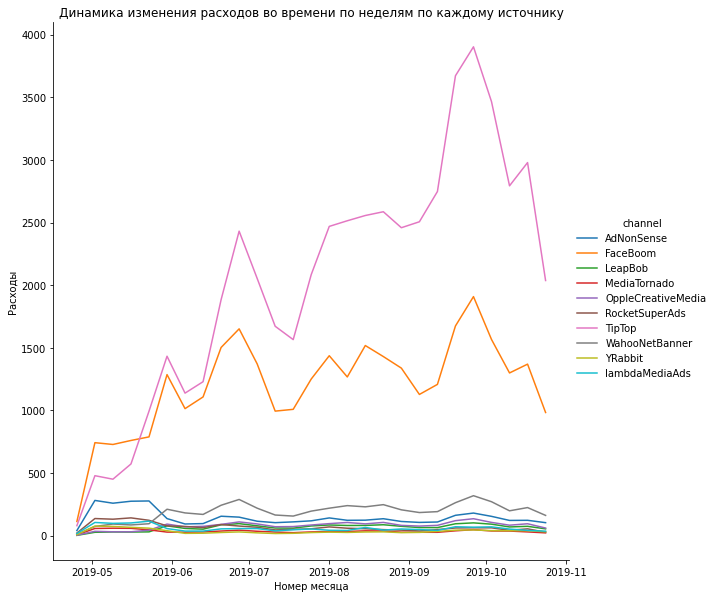

In [52]:
costs_dinamic_week = costs_dinamic.groupby(['channel', 'week']).agg({'costs': 'sum'})
costs_dinamic_week.reset_index
sns.relplot(
    x='week', 
    y='costs', 
    data=costs_dinamic_week,
    kind='line', 
    hue='channel',
    aspect=1,
    height=8).set(
    xlabel='Номер месяца',
    ylabel='Расходы',
    title='Динамика изменения расходов во времени по неделям по каждому источнику')
plt.show()

Очень сильно выросли расходы на TipTop (с 400 в неделю до 4000) и FaceBoom (с 500 в неделю до 1500). Стоимость рекламы в других источниках практически не меняется от недели к неделе.

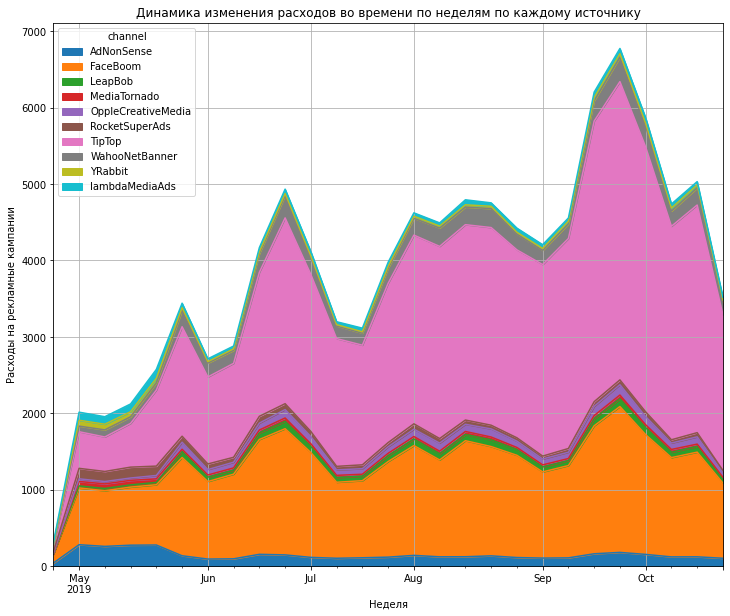

In [53]:
costs_dinamic.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot.area(figsize=(12, 10))
plt.title('Динамика изменения расходов во времени по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламные кампании')
plt.grid()
plt.show()

Затраты на рекламу от недели к неделе меняются не равномерно. Самые большие затраты на рекламу в TipTop, FaceBoom и AdNonSense

#### Построим график с визуализацией динамики изменения расходов во времени по месяцам по каждому источнику.

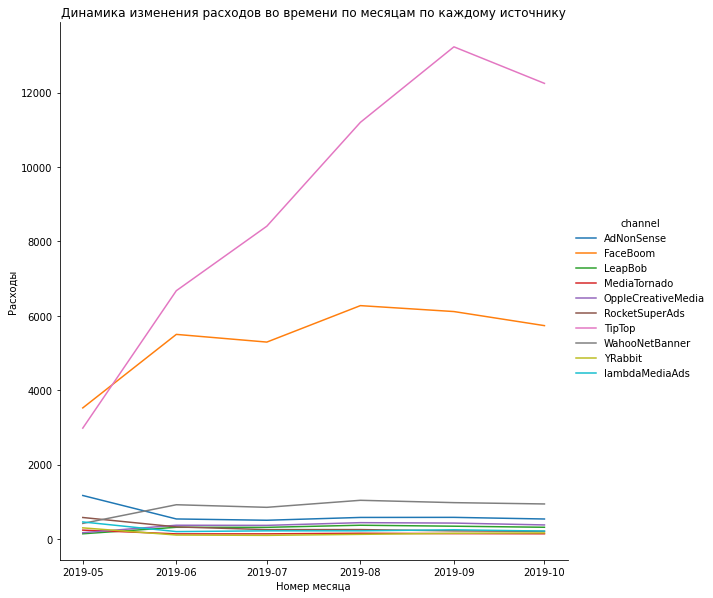

In [54]:
costs_dinamic_month = costs_dinamic.groupby(['channel', 'month']).agg({'costs': 'sum'})
costs_dinamic_month.reset_index
sns.relplot(
    x='month', 
    y='costs', 
    data=costs_dinamic_month,
    kind='line', 
    hue='channel',
    aspect=1,
    height=8).set(
    xlabel='Номер месяца',
    ylabel='Расходы',
    title='Динамика изменения расходов во времени по месяцам по каждому источнику')
plt.show()

Также прослеживается рост расходов на TipTop (с 3 000 в месяц до 13 000) и FaceBoom (примерно с 3 800 в месяц до 6 000). Стоимость рекламы в других источниках практически не меняется от месяца к месяцу.

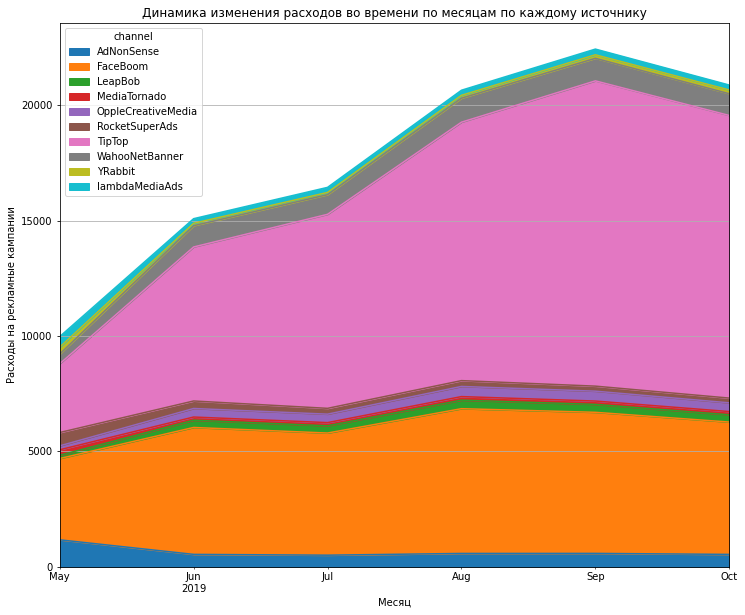

In [55]:
costs_dinamic.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot.area(figsize=(12, 10))
plt.title('Динамика изменения расходов во времени по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламные кампании')
plt.grid()
plt.show()

Общие затраты на рекламу растут от месяца к месяцу с мая по сентябрь. Данные за октябрь не полные, так как максимальная дата в отчете 27.10.2019.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [56]:
cac = profiles.groupby('channel').agg({'acquisition_cost': 'sum', 'user_id': 'count'})
cac.reset_index(inplace=True)
cac

channel  acquisition_cost  user_id
0           AdNonSense           3911.25     3880
1             FaceBoom          32445.60    29144
2              LeapBob           1797.60     8553
3         MediaTornado            954.48     4364
4   OppleCreativeMedia           2151.25     8605
5       RocketSuperAds           1833.00     4448
6               TipTop          54751.30    19561
7       WahooNetBanner           5151.00     8553
8              YRabbit            944.22     4312
9       lambdaMediaAds           1557.60     2149
10             organic              0.00    56439

In [57]:
cac['cac'] = cac['acquisition_cost'] / cac['user_id']
cac.sort_values(by='cac', ascending=False)

channel  acquisition_cost  user_id       cac
6               TipTop          54751.30    19561  2.799003
1             FaceBoom          32445.60    29144  1.113286
0           AdNonSense           3911.25     3880  1.008054
9       lambdaMediaAds           1557.60     2149  0.724802
7       WahooNetBanner           5151.00     8553  0.602245
5       RocketSuperAds           1833.00     4448  0.412095
4   OppleCreativeMedia           2151.25     8605  0.250000
8              YRabbit            944.22     4312  0.218975
3         MediaTornado            954.48     4364  0.218717
2              LeapBob           1797.60     8553  0.210172
10             organic              0.00    56439  0.000000

Самая большая стоимость привлечения пользователя у канала TipTop - 2.8 за пользователя, затем идет FaceBoom - 1.11 за пользователя и AdNonSense - 1 за пользователя.  
Меньше всего стоит привлечение пользователя в LeapBob - 0.21 за пользователя, MediaTornado и YRabbit по 0.22 за пользователя.

#### Вывод.  
- Всего на маркетинг потрачено 105 497.3 за период с 1 мая 2019 по 27 октября 2019.
- Больше всего денег потрачено на TipTop - 54 751.30 и FaceBoom - 32 445.60.
- Очень сильно выросли расходы на TipTop (с 400 в неделю до 4 000) и FaceBoom (с 500 в неделю до 1500). Стоимость рекламы в других источниках практически не меняется от недели к неделе.
- Самая большая стоимость привлечения пользователя у канала TipTop - 2.8 за пользователя, затем идет FaceBoom - 1.11 за пользователя и AdNonSense - 1 за пользователя.  
- Меньше всего стоит привлечение пользователя в LeapBob - 0.21 за пользователя, MediaTornado и YRabbit по 0.22 за пользователя.

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Органические пользователи в анализ не включены.

Установим момент и горизонт анализа данных, а также исключим из анализа органических пользователей:

In [58]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles = profiles.query('channel != "organic"')

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

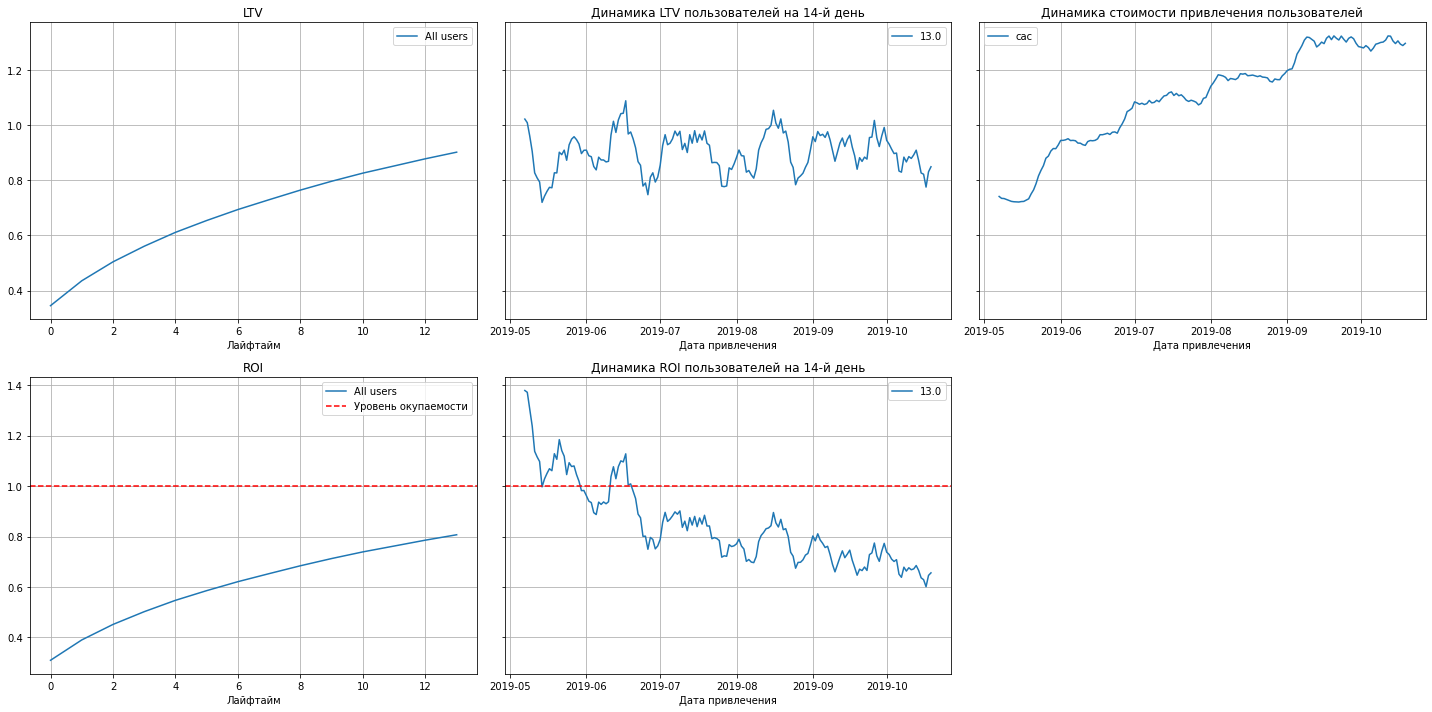

In [59]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- LTV к 14 дню равномерно возрастает.
- LTV держится примерно на одном и том же уровне в рассматриваемый период. У майских пользователей уровень был ниже, примерно 0.5 - 0.6. У пользователей привлеченных с июня по конец октября держится в пределах 0.6 - 0.8.
- Затраты на привлечение пользователя CAC постоянно растут.
- Рекламные затраты в целом не окупаются, к концу второй недели ROI вплотную приближается к 100%, но до уровня окупаемости не доходит.
- Окупаемость рекламных затрат снижается во времени. С начала мая и до третьей декады июня ROI на 14 день был стабильно выше 100%, затем на протяжении месяца были колебания около 100%, а с последней декады июля ROI ни разу не превысил 100%.  

#### Проверим конверсию пользователей и динамику её изменения. Построим графики конверсии и динамики.

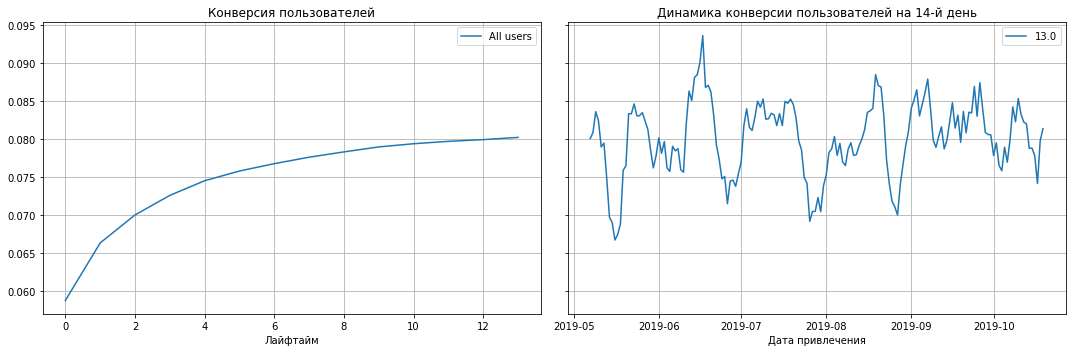

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей в общем растет. Конверсия пользователей привлеченных в июне значительно увеличилась по сравнению конверсией майских пользователей. Затем до конца октября значительных изменений нет. Конверсия колеблется примерно в одном и том же диапазоне. Минимальный пик в середине мая, максимальный в середине июня.

Построим графики конверсии в разбивке по устройствам

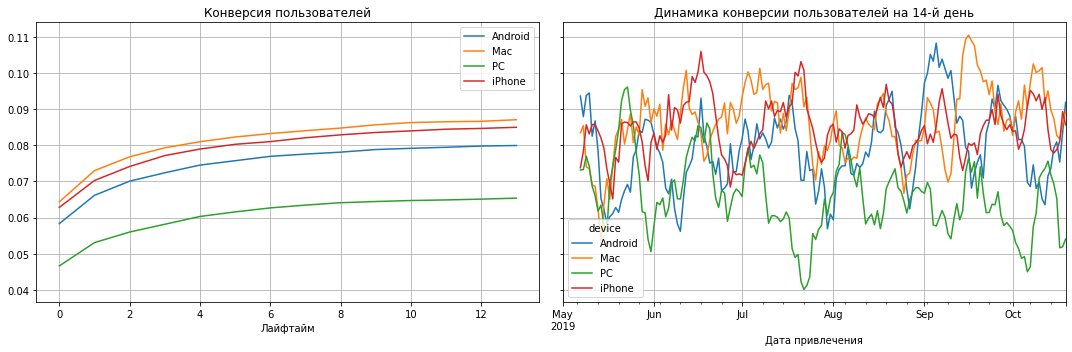

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия у пользователей PC самая низкая. Выше у пользователей Android. Самая большая конверсия пользователей Mac и iPhone.

Построим графики конверсии в разбивке по странам

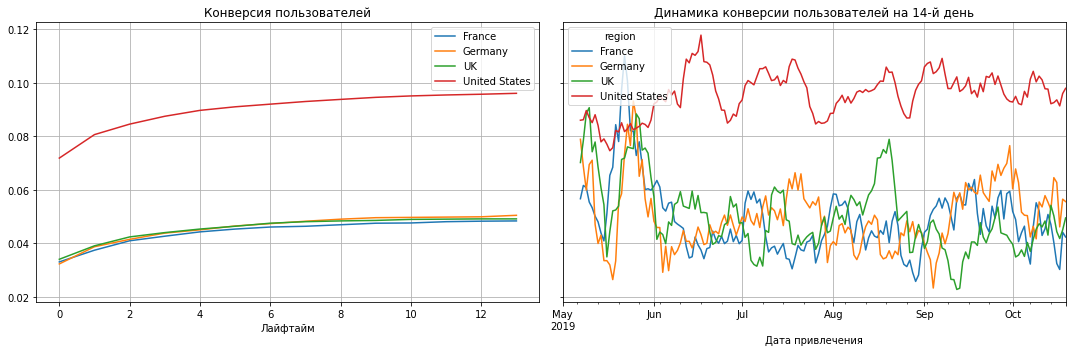

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у пользователей из Соединенных Штатов Америки, в 2 раза выше чем у Франции, Германии и Великобритании. Между остальными тремя странами разница в конверсии не значительна.

Построим графики конверсии в разбивке по каналам привлечения

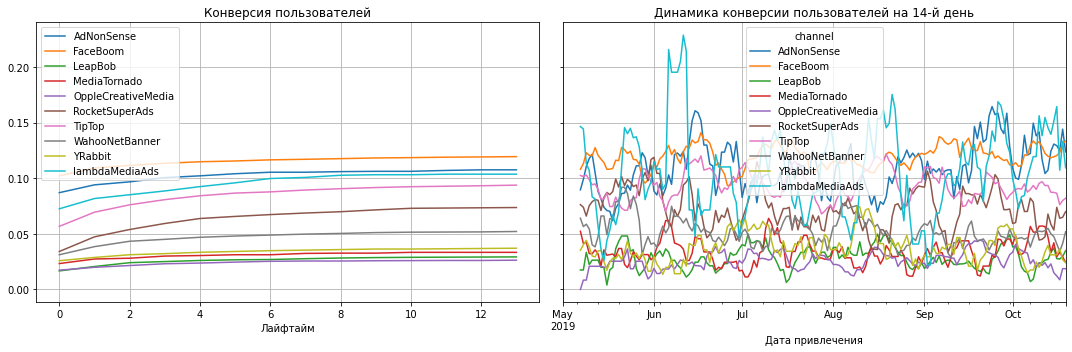

In [63]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у пользователей привлеченных через FaceBoom. Также достаточно высокий уровень конверсии у пользователей, пришедших через AdNonSense, lambdaMediaAds и TipTop.

#### Проверим удержание пользователей и динамику его изменения. Построим графики удержания и динамики.

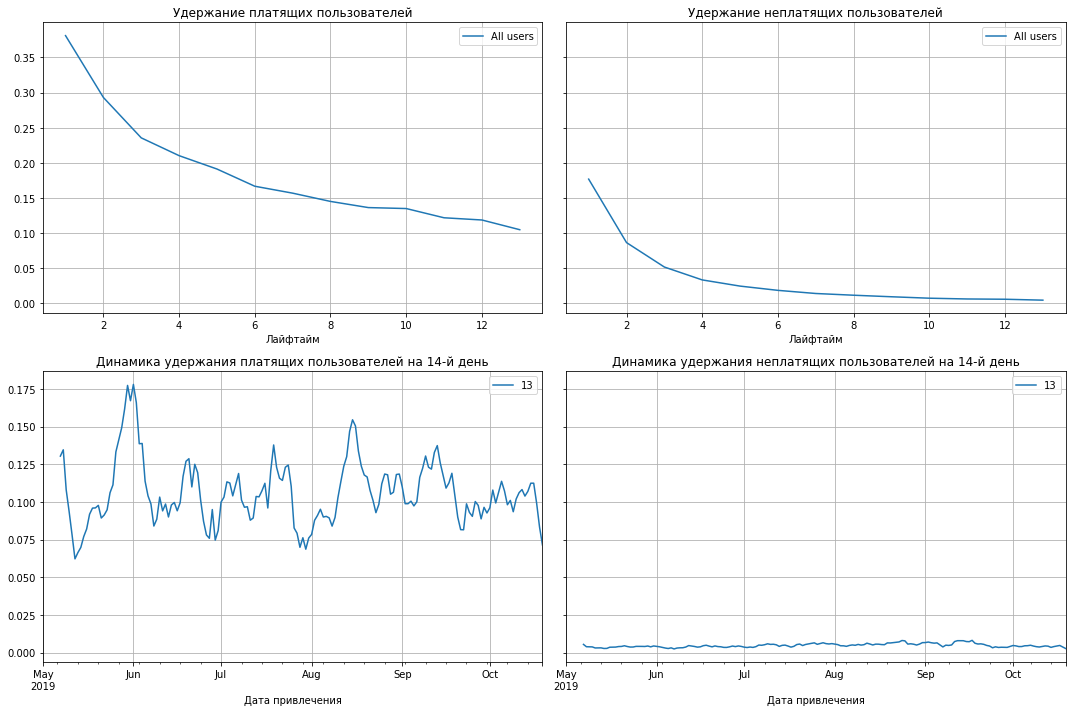

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей выше, чем неплатящих.  
Самый высокий уровень удержания на 14-й день у платящих пользователей привлеченных в начале июня. Самый низкий в конце июня. Уровень колеблется не значительно.

Построим графики удержания в разбивке по устройствам

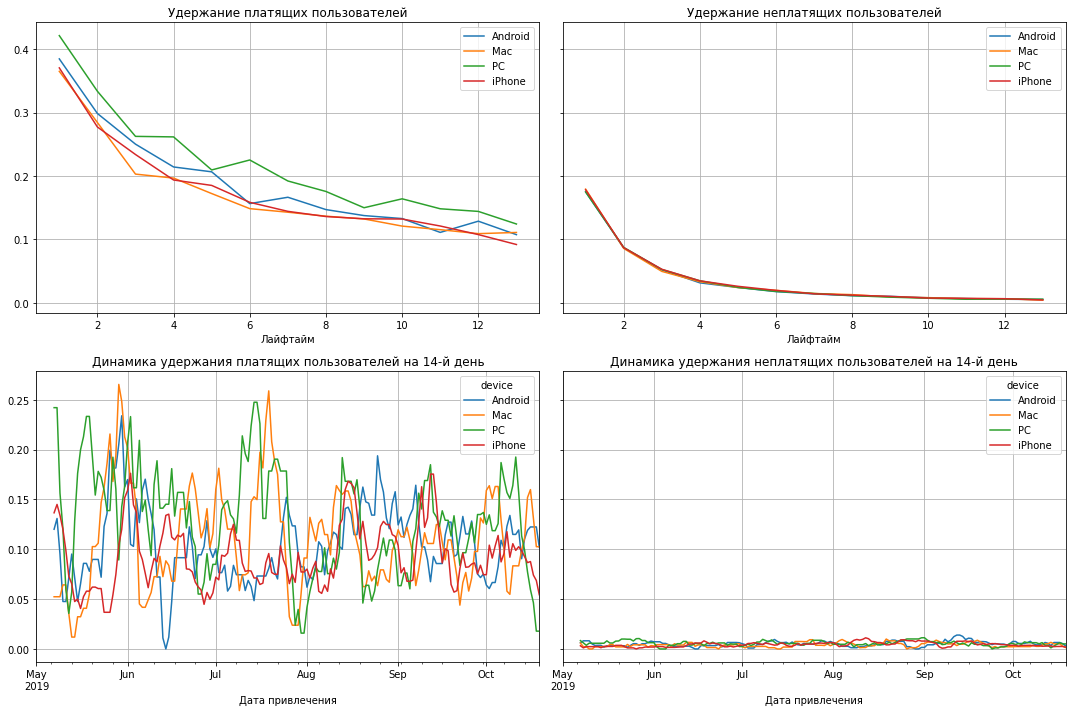

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Значительных различий в удержании платящих пользователей разных устройств не наблюдается. Уровень удержания на 14-й день у пользователей PC немного выше, чем у остальных.  
У неплатящих пользователей разницы в удержании нет.

Построим графики удержания в разбивке по странам

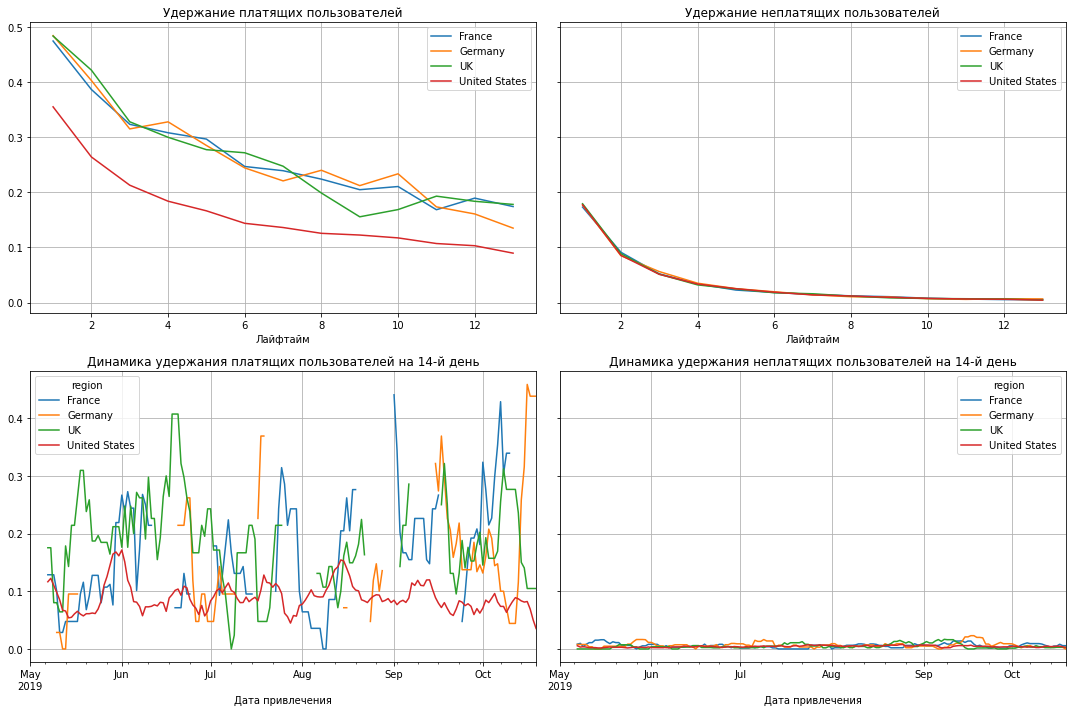

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention_grouped, retention_history, horizon_days)

В США самый низкий уровень удержания платящих пользователей, в 2 раза ниже чем у пользователей из Франции и Великобритании.  
У неплатящих пользователей разницы в удержании нет.

Построим графики удержания в разбивке по каналам привлечения пользователей

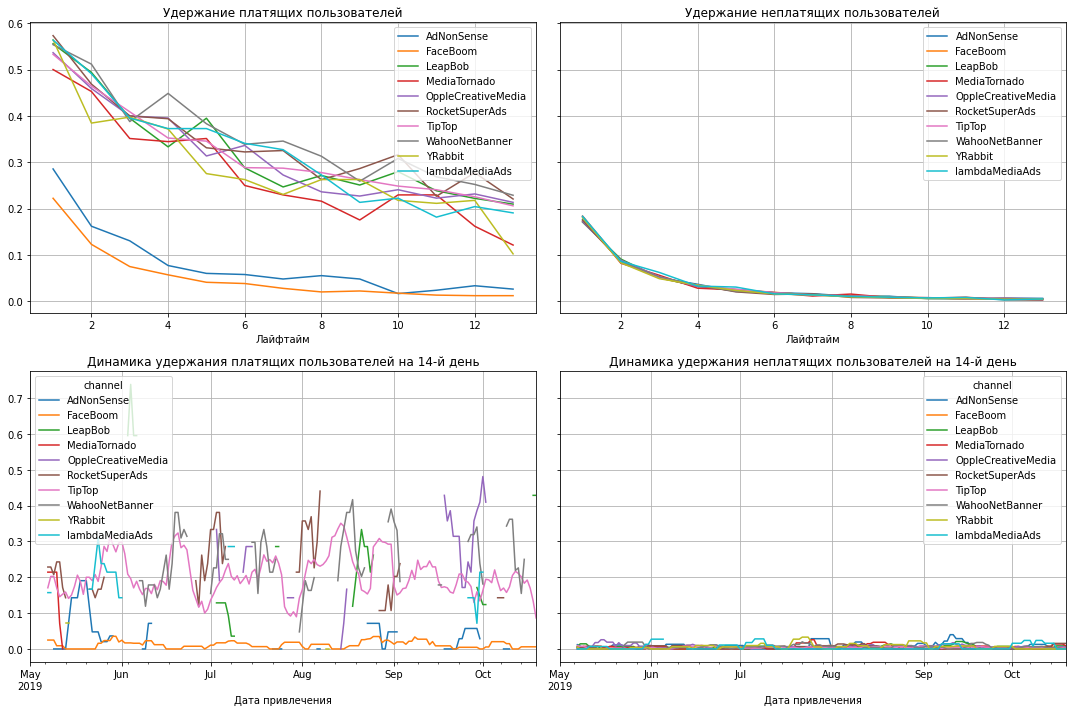

In [67]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Самый низкий уровень удержания на 14-й день у пользователей, привлеченных через AdNonSense и FaceBoom. Примерно в 4 раза ниже, чем у пользователей привлеченных другими каналами.
В динамике также стабильно аутсайдер FaceBoom. 
У неплатящих пользователей разницы в удержании нет.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

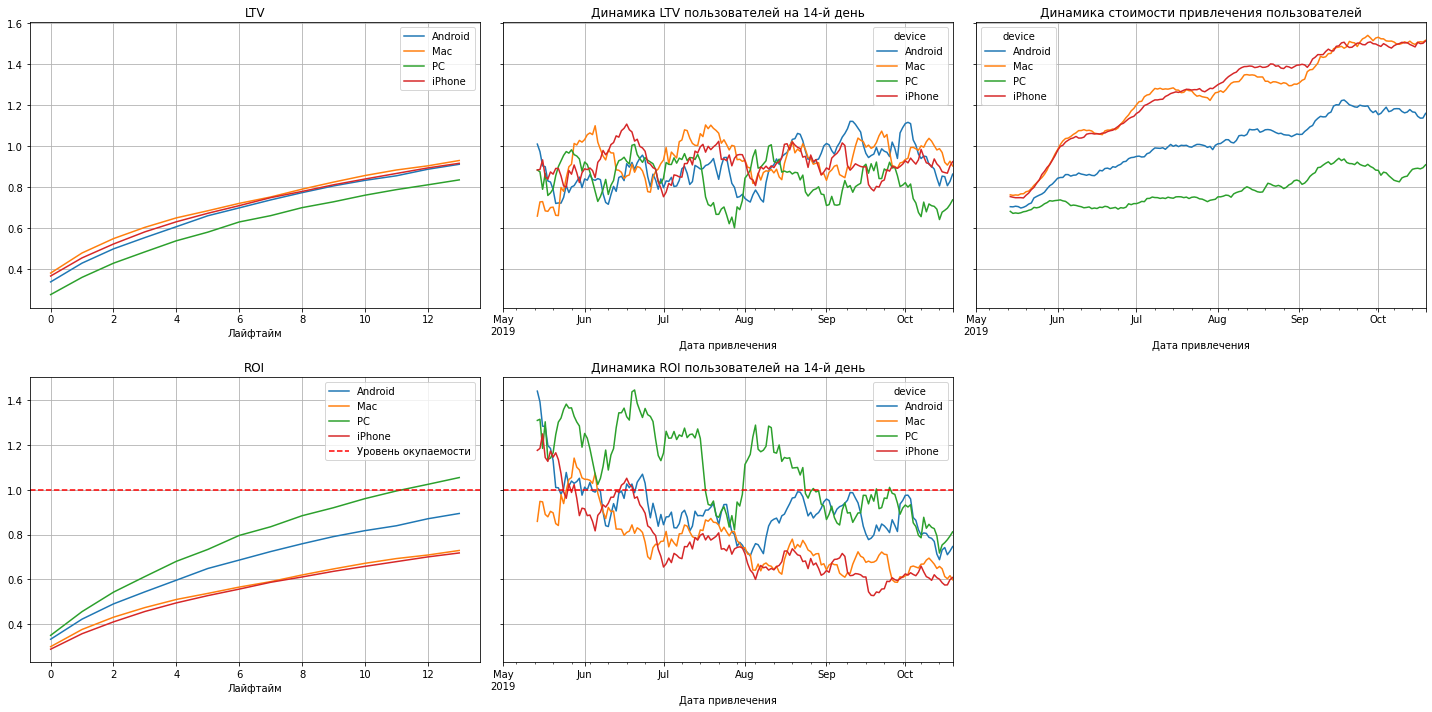

In [68]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Самый низкий LTV у пользователей PC. Между пользователями MAC, iPhone и Android значительных различий нет.
- LTV колеблется в пределах 06-1.1 у пользователей всех устройств. Никаких закономерностей не наблюдается.
- Стоимость привлечения растет для пользователей всех устройств. При этом самая высокая стоимость для пользователей MAC и iPhone, а самая низкая для пользователей PC.
- Рекламные затраты на привлечение пользователей окупаются только у пользователей PC. Затраты на привлечение пользователей на MAC, Android и iPhone не окупаются на 14-й день.
- С середины июня затраты на привлечение пользователей Android, iPhone и MAC стабильно не окупаются. Привлечение пользователей PC не окупается во второй половине июля, а также с конца августа и до самого окончания анализируемого периода.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

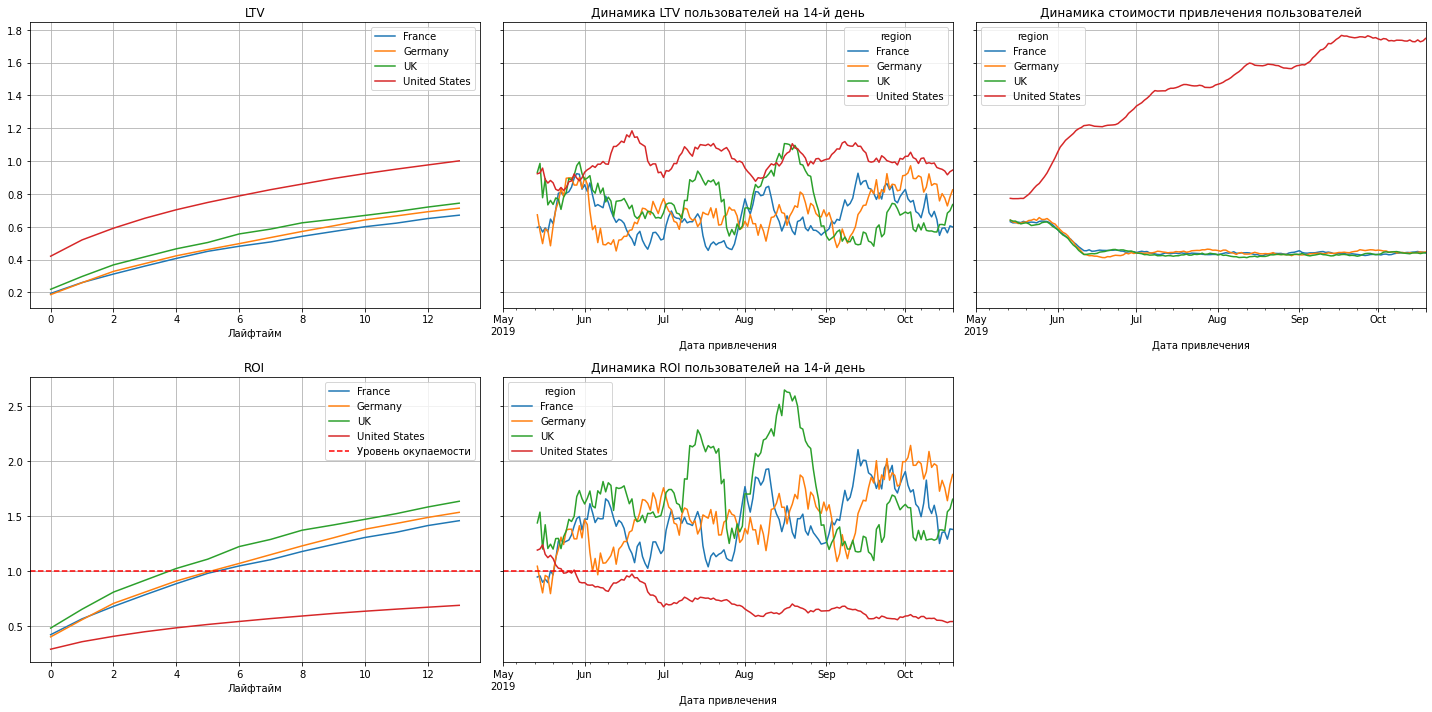

In [69]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

#### Проанализируем окупаемость рекламы с разбивкой по  рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

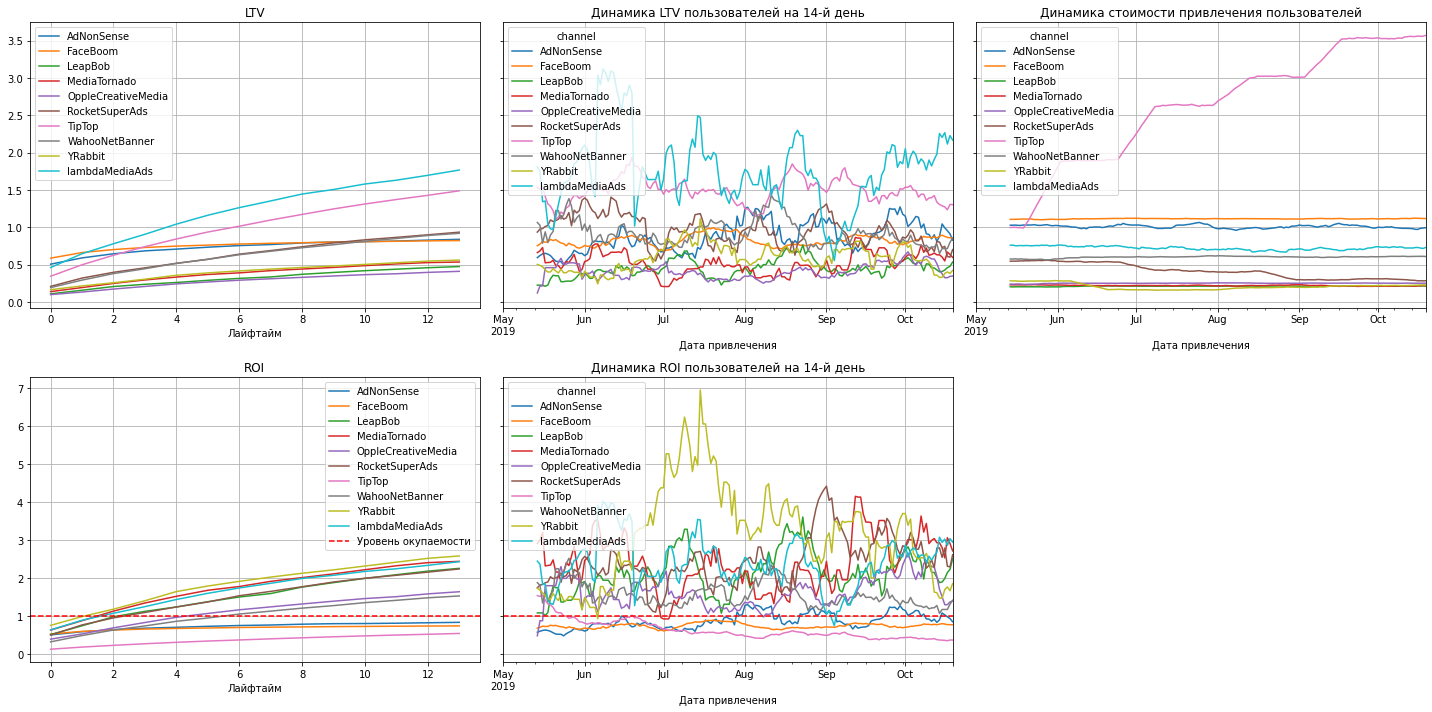

In [70]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Самый высокий LTV у пользователей привлеченных каналами lambdaMediaAds и TipTop.
- Стабильно больше всего денег приносят пользователи привлеченные каналами lambdaMediaAds и TipTop, разница между остальными каналами во времени не особо заметна.
- Стоимость привлечения пользователей канала TipTop резко возрастает. В остальных каналах изменения не значительные.
- Рекламные затраты на привлечение пользователей на 14-й день окупаются у всех каналов, кроме TipTop, FaceBoom и AdNonSense. Самый большой уровень окупаемости у каналов YRabbit, lambdaMediaAds и MediaTornado.
- Привлечение пользователей каналами TipTop и FaceBoom не окупалось никогда, каналом AdNonSense периодически окупалось. Привлечение пользователей остальными каналами всегда окупалось. Самый высокий уровень ROI у пользователей привлеченных в июле через канал YRabbit.

#### Сделаем разбивку пользователей по странам. Отделим США и остальные страны.

Посмотрим отдельно на графики LTV и ROI, а также графики динамики LTV, CAC и ROI в Соединенных штатах Америки и в Европе в разбивке по устройствам и по каналим привлечения пользователей.

In [71]:
profiles_usa = profiles.query('region == "United States"')
profiles_europe = profiles.query('region != "United States"')

Графики пользователей из США в разбивке по устройствам

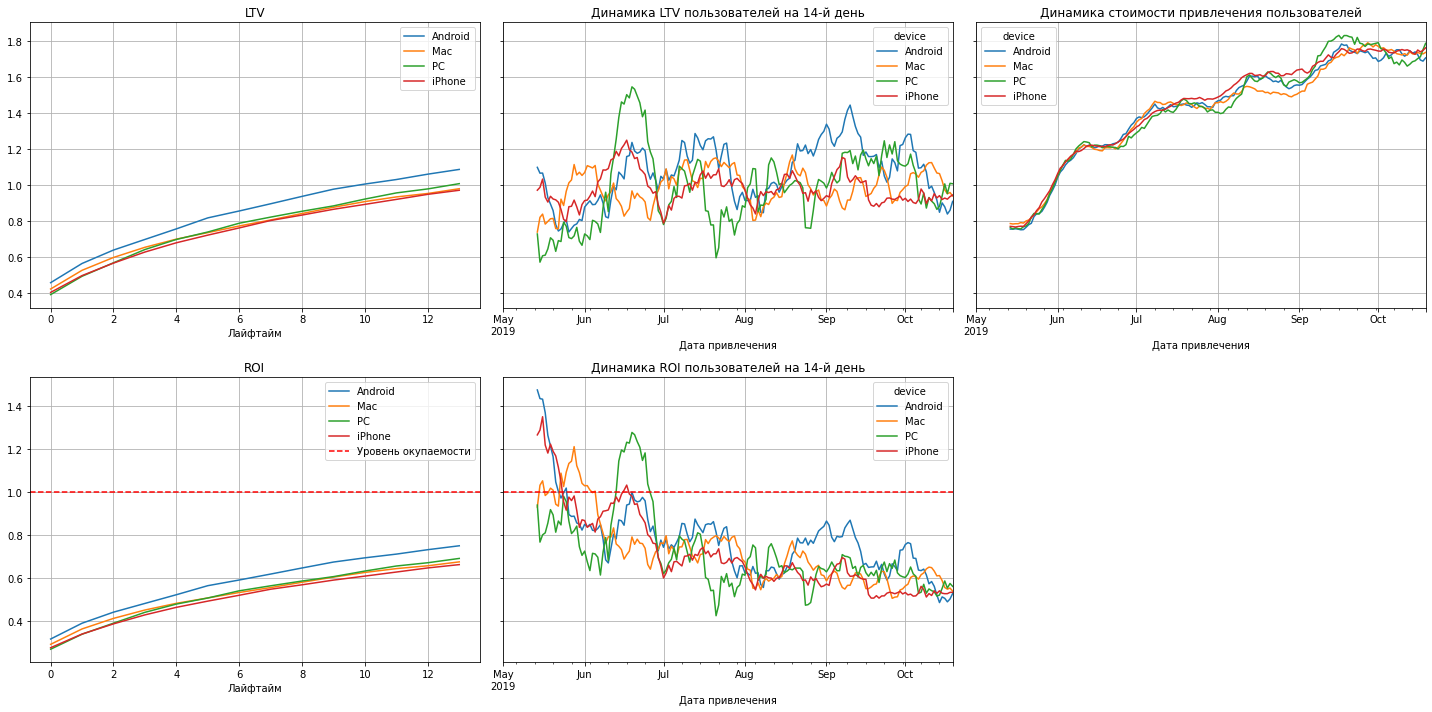

In [72]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Больше всего денег в Соединенных Штатах Америки приносят пользователи Android, но разница между пользователями разных устройств не значительна. Вложения в рекламу не окупаются у пользователей всех устройств.

Графики пользователей из США в разбивке по рекламным каналам

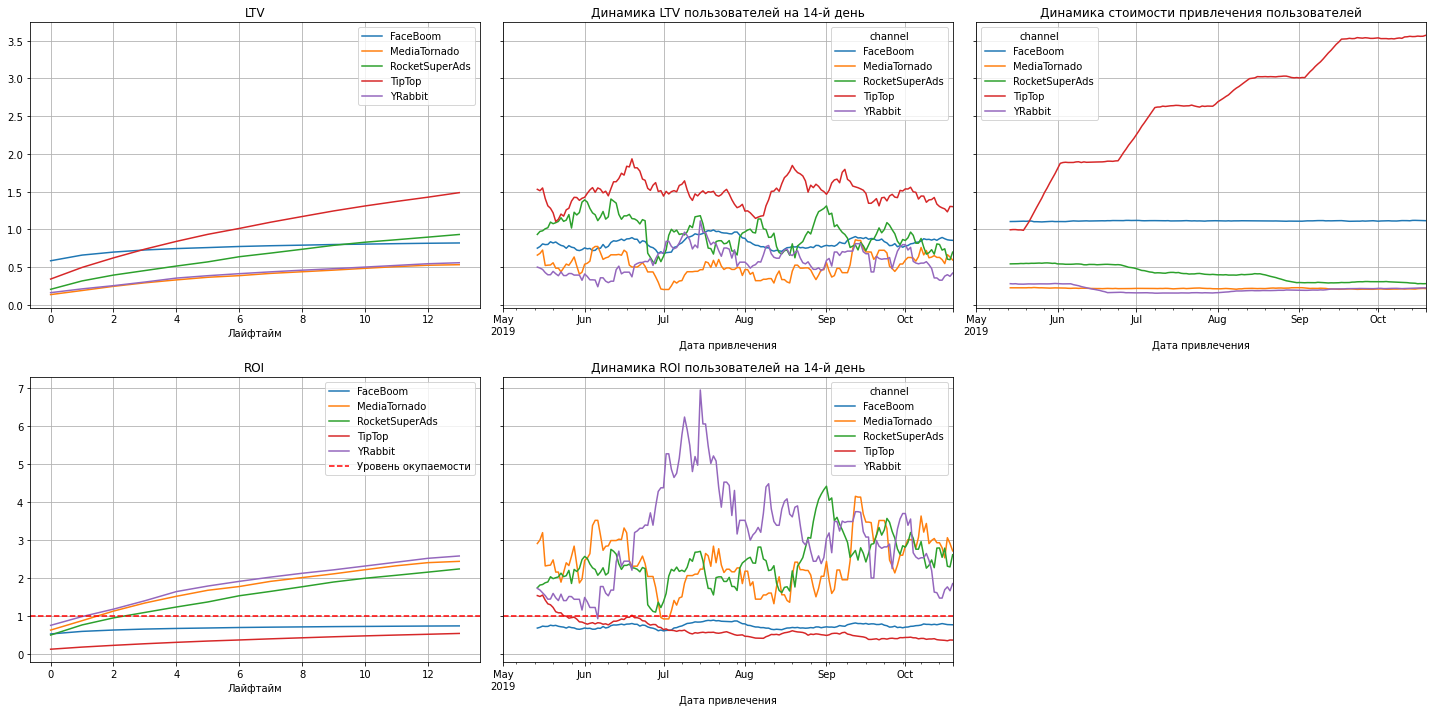

In [73]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В Соединенных Штатах Америки пользователи привлекаются 5 каналами: FaceBoom, MediaTornado, RocketSuperAds, TipTop, YRabbit.  
Больше всего денег приносят пользователи привлеченные TipTop, меньше всего YRabbit и MediaTornado.  
Стоимость привлечения через TipTop постоянно растет, а через RocketSuperAds даже немного снижается.

Различий между пользователями разных устройств в США практически нет. Посмотрим также на графики конверсии и удержания в США в разбивке по рекламным каналам

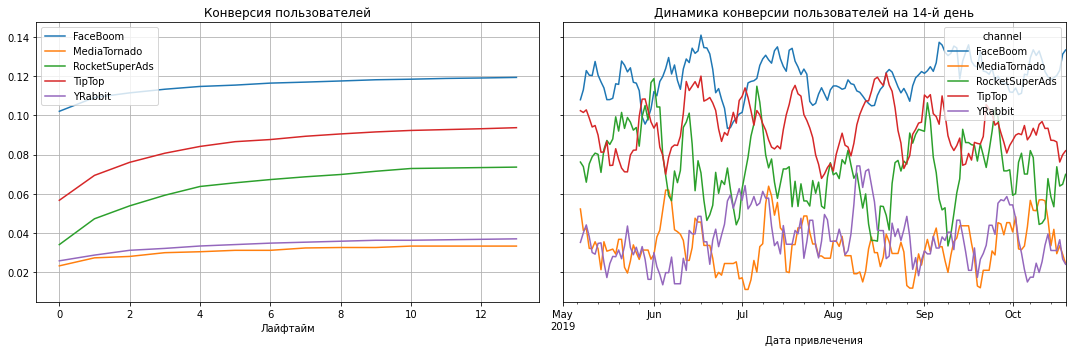

In [74]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у пользователей Соединенных Штатов Америки, пришедших через FaceBoom. На втором и третьем месте TipTop и RocketSuperAds соответственно. 

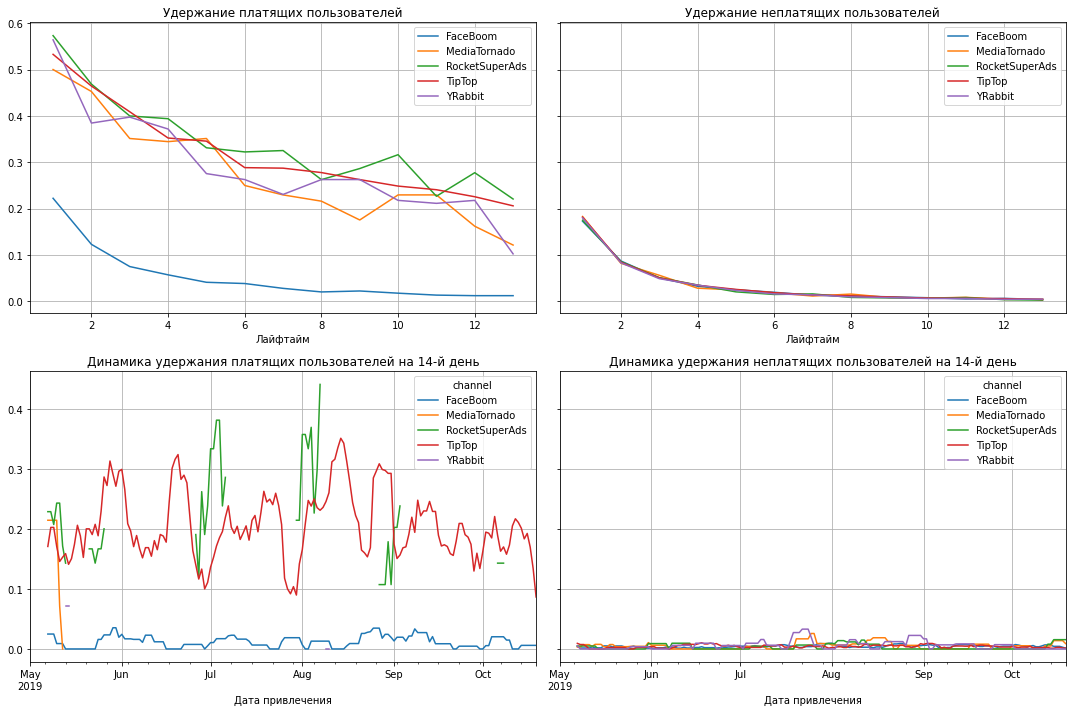

In [75]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей Соединенных Штатов Америки, привлеченных через FaceBoom стабильно самое низкое. Самое высокое стабильно у платящих пользователей, привлеченных через TipTop и RocketSuperAds  

Графики пользователей из Европы в разбивке по устройствам

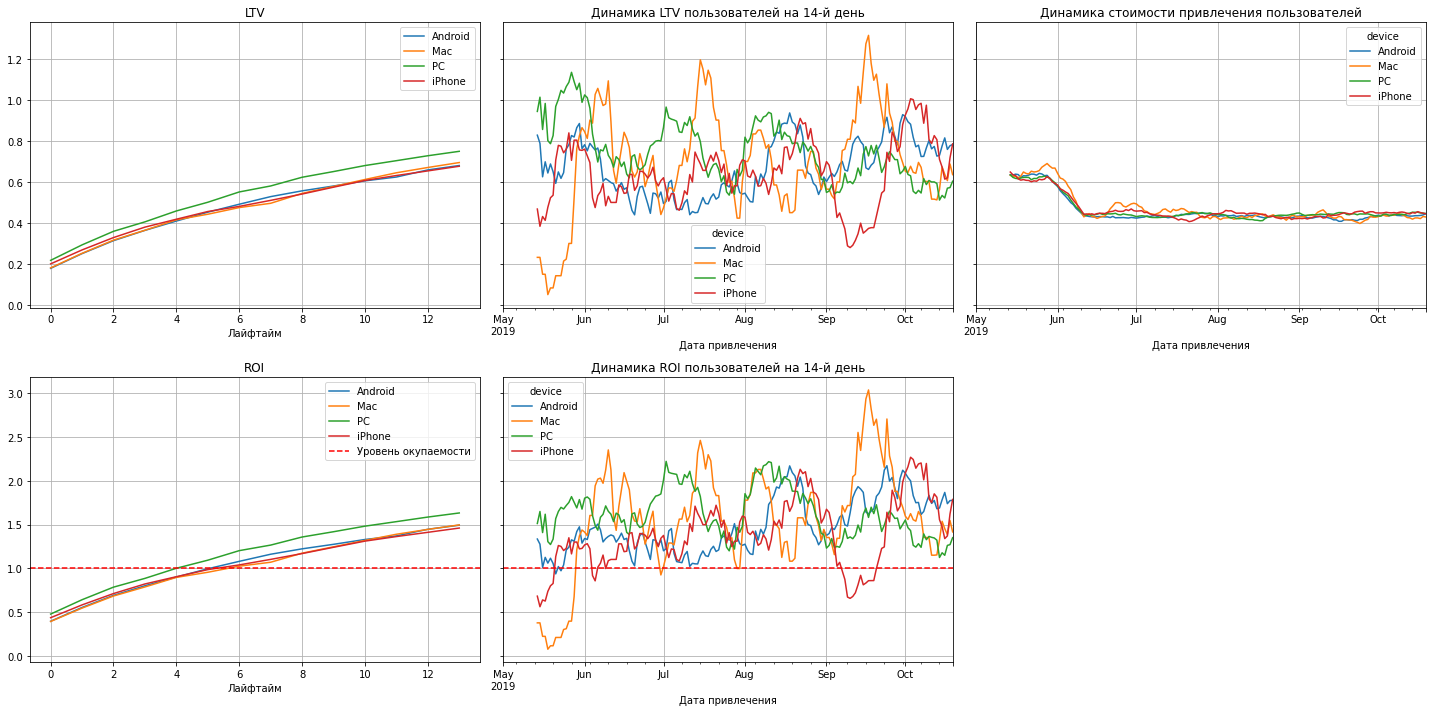

In [76]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В Европе больше всего денег приносят пользователи PC, однако максимальных значений в динамике достигают пользователи Mac.  
Вложения в рекламу в Европе окупаются для пользователей всех устройств.

Графики пользователей из Европы в разбивке по рекламным каналам.

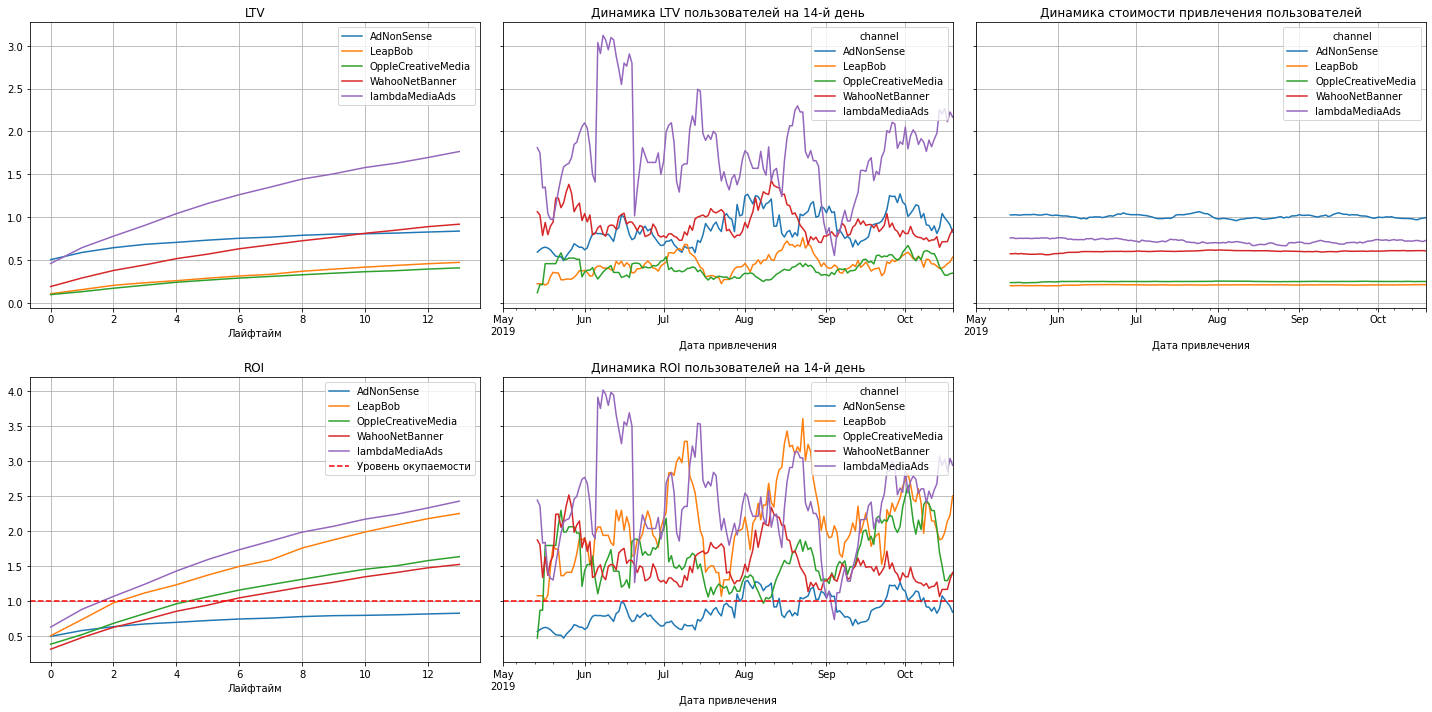

In [77]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В Европе пользователи привлекаются 5 каналами: AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds.  
Больше всего денег приносят пользователи привлеченные lambdaMediaAds и WahooNetBanner. Меньше всего LeapBob и OppleCreativeMedia.  
Стоимость привлечения всеми каналами не меняется. Самая большая стоимость привлечения через AdNonSense, самая низкая LeapBob и OppleCreativeMedia.  
Вложения в рекламу на 14-й день не окупаются только у пользователей пришедших через AdNonSense. Лучше всего окупаютя пользователи пришедшие через lambdaMediaAds и LeapBob.

Различий между пользователями разных устройств в Европе практически нет. Посмотрим также на графики конверсии и удержания в Европе в разбивке по рекламным каналам

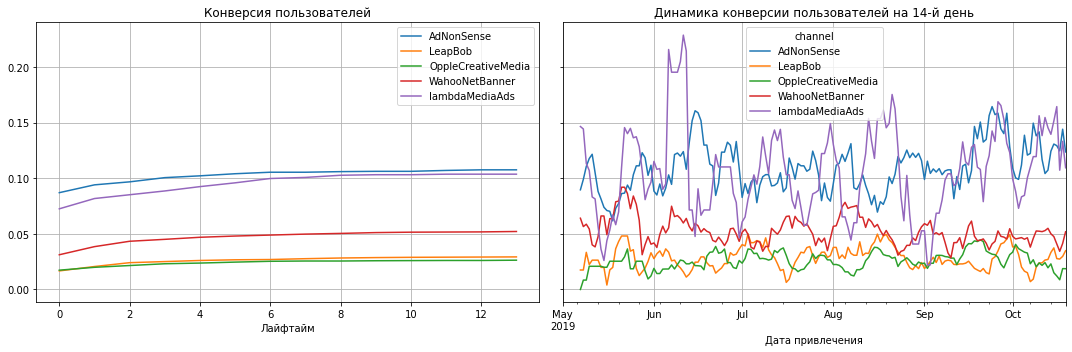

In [78]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_europe, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Стабильно самая высокая конверсия у пользователей Европы, пришедших через AdNonSense и lambdaMediaAds.

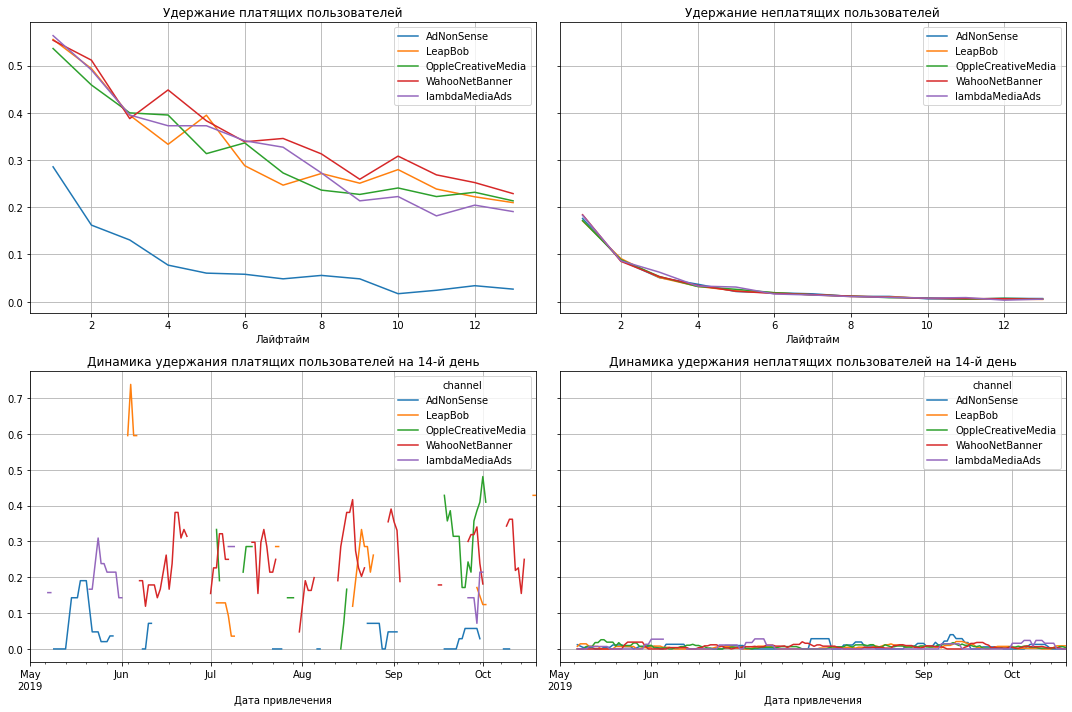

In [79]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_europe, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Самый низкий уровень удержания у платящих пользователей, пришедших через AdNonSense. У платящих пользователей, пришедших через другие каналы уровень удержания примерно одинаков.

####  Ответим на вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?  
В целом вложения в рекламу не окупаются.      
     
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?  
Негативное влияние на окупаемость рекламы оказали:  
1) Устройства iPhone и MAC;  
2) Страна - Соединенные Штаты Америки;  
3) Каналы TipTop, FaceBoom и AdNonSense.  

    - Чем могут быть вызваны проблемы окупаемости?  
Проблемы с окупаемостью связаны с излишним вложением денежных средств в рекламу через каналы TipTop и FaceBoom.

### Общий вывод
Проведен анализ данных развлекательного приложения Procrastinate Pro+. В наличии данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. По результатам анализа выполнено и установлено следующее:  

**1) Проведена предобработка данных:**

- Названия столбцов всех трех датафреймов приведены к виду snake_case.
- Пропуски и дубликаты не установлены.
- Редких и аномальных значений не выявлено.
- Столбцы с датой и временем приведены к типу Datetime.

**2) Проведен исследовательский анализ данных:**

- Всего в данных содержится информация о 150 008 уникальных пользователях.
- Самая ранняя дата привлечения пользователей 01 мая 2019, самая поздняя - 27 октября 2019.
- Всего в списке стран - 4 страны: Соединенные Штаты Америки (United States),  Франция (France), Великобритания (UK) и Германия (Germany). Самое большое число пользователей в Соединенных Штатах Америки - 100 002 (66% от общего количества). Доля платящих пользователей  в США также самая большая - 6.9%. Во Франции и Великобритании число пользователей примерно одинаковое 17 450 (доля платящих - 3.8%) и 14 981 (доля платящих - 3.98%) соответственно.  Самое маленькое число пользователей в Германии - 14 981 (доля платящих - 4.11%).
- Всего в списке 4 устройства: Mac, iPhone, Android и PC. Самое большое число пользователей владельцы iPhone - 54 479 (36% от общего количества). Доля платящих пользователей iPhone  - 6.21%. На втором месте пользователи Android - 35 032 (доля платящих - 5.85%). На третьем пользователи PC - 30 455 (доля платящих - 5.05%). Самое маленькое число пользователей Mac - 30 042 (доля платящих - 6.36%).
- Всего в данных содержится информация о 10 каналах привлечения пользователей, а также о пользователях пришедших в приложение самостоятельно (organic). Самое большое количество пользователей пришло самостоятельно. Оrganic пользоввтелей всего 56 439 (38% от общего количества). Но при этом доля платящих organic пользователей самая маленькая и составляет всего 2.06%.  Среди платных каналов на первом месте по количеству привлеченных пользователей FaceBoom - 29 144 пользователей, при этом доля платящих пользователей также самая большая - 12.20%.  На втором месте TipTop - 19 561 пользователей. Доля платящих достаточно большая - 9.60% (четвертая по величине).  Меньше всего пользователей пришло из рекламы через lambdaMediaAds - 2149, но при этом доля платящих пользователей 10.47% (третья по величине).

**3) Проведен анализ маркетинга:**

- Всего за период с 01 мая 2019 по 27 октября 2019 на маркетинг потрачено 105 497.3. 
- Больше всего денег потрачено на TipTop – 54 751.30 (52% всех расходов) и FaceBoom – 32 445.60 (31% всех расходов).
- Самый большой рост расходов по неделям на рекламу в TipTop (увеличение с 400 в неделю до 4000) и FaceBoom (увеличение с 500 в неделю до 1500). Затраты на рекламу через другие источники практически не меняется от недели к неделе.
- Общие затраты на рекламу растут от месяца к месяцу с мая по сентябрь. Данные за октябрь не полные, так как максимальная дата в отчете 27.10.2019
- Самая большая стоимость привлечения пользователя через канал TipTop - 2.8 за пользователя, затем идет FaceBoom - 1.11 за пользователя и AdNonSense - 1 за пользователя.
- Меньше всего стоит привлечение пользователя через LeapBob - 0.21 за пользователя, MediaTornado и YRabbit по 0.22 за пользователя.

**4) Проведен анализ окупаемости рекламы:**

- В отношении всех неорганических пользователей установлено:

    - LTV к 14 дню равномерно возрастает.
    - LTV колеблется в одном и том же диапазоне  весь рассматриваемый период (в пределах 0.7-1.1), то есть приложение весь период работает достаточно стабильно без явных изменений.  
    - Затраты на привлечение пользователя CAC постоянно растут.
    - Рекламные затраты в целом не окупаются, к концу второй недели ROI вплотную приближается к 100%, но до уровня окупаемости не доходит.
    - Окупаемость рекламных затрат снижается во времени. В мае ROI на 14 день был выше 100%, в начале июня были колебания около 100%, а с середины июня ROI ни разу не превысил 100%.  
    
- В отношении конверсии пользователей в разбивке по устройствам, странам и каналам привлечения установлено:

    - Конверсия у пользователей PC самая низкая. Выше у пользователей Android. Самая большая конверсия пользователей Mac и iPhone.
    - Самая высокая конверсия у пользователей из Соединенных Штатов Америки, в 2 раза выше, чем у пользователей Франции, Германии и Великобритании. Между ними разница в конверсии не значительна.
   - Самая высокая конверсия у пользователей привлеченных через FaceBoom. Также достаточно высокий уровень конверсии у пользователей, пришедших через AdNonSense, lambdaMediaAds и TipTop.
   
- В отношении удержания пользователей в разбивке по устройствам, странам и каналам привлечения установлено:

    - Значительных различий в удержании платящих пользователей разных устройств не наблюдается. Уровень удержания на 14-й день у пользователей PC немного выше, чем у остальных.  У не платящих пользователей разницы в удержании нет.
    - В США самый низкий уровень удержания платящих пользователей, в 2 раза ниже чем у пользователей из Франции и Великобритании.  У не платящих пользователей разницы в удержании нет.
    - Самый низкий уровень удержания на 14-й день у пользователей, привлеченных через каналы AdNonSense и FaceBoom. Примерно в 4 раза ниже, чем у пользователей привлеченных другими каналами. В динамике также стабильно аутсайдер FaceBoom.  У не платящих пользователей разницы в удержании нет.
  
- В отношении жизненной ценности пользователя (LTV), стоимости привлечения пользователя (CAC) и окупаемости рекламных инвестиций (ROI) в разбивке по устройствам, странам и каналам привлечения установлено:

    - в разбивке по устройствам:
    
        - Самый низкий LTV у пользователей PC. Между пользователями MAC, iPhone и Android значительных различий нет.
        - LTV колеблется в пределах 06-1.1 у пользователей всех устройств. Никаких закономерностей не наблюдается.
        - Стоимость привлечения растет для пользователей всех устройств. При этом самая высокая стоимость для пользователей MAC и iPhone, а самая низкая для пользователей PC.
        - Рекламные затраты на привлечение пользователей окупаются только у пользователей PC. Затраты на привлечение пользователей на MAC, Android и iPhone не окупаются на 14-й день.
        - С середины июня затраты на привлечение пользователей Android, iPhone и MAC стабильно не окупаются. Привлечение пользователей PC не окупается во второй половине июля, а также с конца августа и до самого окончания анализируемого периода.

    - в разбивке по странам:
  
        - Самый высокий LTV у пользователей в Соединенных Штатах Америки, самый низкий во Франции. Между ними примерно одинаковые кривые у пользователей Германии и Великобритании.
        - Стабильно больше всего денег приносят пользователи из Соединенных Штатов Америки, разница между остальными странами во времени не особо заметна.
        - Стоимость привлечения пользователей резко возрастает для Соединенных Штатов Америки. В остальных странах изменения не значительные.
        - Рекламные затраты на привлечение пользователей на 14-й день окупаются у пользователей всех стран, кроме Соединенных Штатов Америки.
        - С конца мая затраты на привлечение пользователей из Соединенных Штатов Америки не окупаются.

    - в разбивке по каналам привлечения:
   
        - Самый высокий LTV у пользователей привлеченных каналами lambdaMediaAds и TipTop.
        - Стабильно больше всего денег приносят пользователи привлеченные каналами lambdaMediaAds и TipTop, разница между остальными каналами во времени не особо заметна.
        - Стоимость привлечения пользователей канала TipTop резко возрастает. В остальных каналах изменения не значительные.
        - Рекламные затраты на привлечение пользователей на 14-й день окупаются у всех каналов, кроме TipTop, FaceBoom и AdNonSense. Самый большой уровень окупаемости у каналов YRabbit, lambdaMediaAds и MediaTornado.
        - Привлечение пользователей каналами TipTop и FaceBoom не окупалось никогда, каналом AdNonSense периодически окупалось. Привлечение пользователей остальными каналами всегда окупалось. Самый высокий уровень ROI у пользователей привлеченных в июле через канал YRabbit.

**По результатам проведенного анализа установлено, что вложения в рекламу не окупаются у пользователей всех устройств, кроме PC; у пользователей из Соединенных Штатов Америки; у пользователей привлеченных через каналы TipTop, FaceBoom и AdNonSense.**

Проведен анализ конверсии, удержания, LTV, ROI, динамики LTV, CAC и ROI отдельно по США и всем странам Европы вместе (Германии, Великобритании и Франции).

- В отношении пользователей США установлено следующее:
    - Больше всего денег в Соединенных Штатах Америки приносят пользователи Android, но разница между пользователями разных устройств не значительна. Вложения в рекламу не окупаются у пользователей всех устройств.
    - В Соединенных Штатах Америки пользователи привлекаются 5 каналами: FaceBoom, MediaTornado, RocketSuperAds, TipTop, YRabbit.
    - Больше всего денег приносят пользователи привлеченные TipTop, меньше всего YRabbit и MediaTornado.
    - Стоимость привлечения через TipTop постоянно растет, а через RocketSuperAds даже немного снижается.
    - Самая высокая конверсия у пользователей Соединенных Штатов Америки, пришедших через FaceBoom. На втором и третьем месте TipTop и RocketSuperAds соответственно.
    - Удержание платящих пользователей Соединенных Штатов Америки, привлеченных через FaceBoom стабильно самое низкое. Самое высокое стабильно у платящих пользователей, привлеченных через TipTop и RocketSuperAds.

- В отношении пользователей Европейских стран установлено следующее:
    - В Европе больше всего денег приносят пользователи PC, однако максимальных значений в динамике достигают пользователи Mac.
    - Вложения в рекламу в Европе окупаются для пользователей всех устройств.
    - В Европе пользователи привлекаются 5 каналами: AdNonSense, LeapBob, OppleCreativeMedia, WahooNetBanner, lambdaMediaAds.
    - Больше всего денег приносят пользователи привлеченные lambdaMediaAds и WahooNetBanner. Меньше всего LeapBob и OppleCreativeMedia.
    - Стоимость привлечения всеми каналами не меняется. Самая большая стоимость привлечения через AdNonSense, самая низкая LeapBob и OppleCreativeMedia.
    - Вложения в рекламу на 14-й день не окупаются только у пользователей, пришедших через AdNonSense. Лучше всего окупаются пользователи, пришедшие через lambdaMediaAds и LeapBob.
    - Стабильно самая высокая конверсия у пользователей Европы, пришедших через AdNonSense и lambdaMediaAds.
    - Самый низкий уровень удержания у платящих пользователей, пришедших через AdNonSense. У платящих пользователей, пришедших через другие каналы уровень удержания примерно одинаков.
    
    
**Отделу маркетинга развлекательного приложения Procrastinate Pro+ рекомендуется сократить рекламные расходы через канал TipTop () и FaceBoom в Соединенных Штатах Америки и канал AdNonSense в странах Европы.  
В США можно рассмотреть вопрос об увеличении расходов на привлечение пользователей чарез канал RocketSuperAds, а в Европе через lambdaMediaAds.**
